<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_tests_positivos_informados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

Data downloaded from
https://docs.google.com/spreadsheets/d/1N0iLu6dVBD5hr0i1Yk4d_gs9GQIYrvkuURe4ZX9_Hu4/edit#gid=0
as CSV file to Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
full_data_raw = pd.read_csv("gdrive/My Drive/2020-04-07-Avance-coronavirus.csv", index_col="Día")
full_data_raw.head()

,Tests informados día,Personas con tests informados,% aumento,% positividad sobre tests del día,% positividad sobre tests acumulados,Positivos día,Positivos acumulados,% aumento.1,Hospitalizados en unidades críticas,% aumento.2,% hospitalizados / casos positivos,Ventilación mecánica,% ventilados / casos positivos,Estado crítico,% críticos / casos positivos,Recuperados estimados día,Recuperados estimados total,% aumento.3,% respecto de casos positivos,Fallecidos día,Fallecidos acumulado,% aumento.4,% letalidad,Casos activos
Día,,,,,,,,,,,,,,,,,,,,,,,,
3-Mar-2020,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-Mar-2020,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-Mar-2020,NaN,NaN,NaN,NaN,NaN,1,4,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6-Mar-2020,NaN,NaN,NaN,NaN,NaN,1,5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-Mar-2020,NaN,NaN,NaN,NaN,NaN,2,7,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
tests_raw = full_data_raw["Tests informados día"]
index_ = tests_raw[tests_raw > 0].keys()[0]
tests_raw = tests_raw[index_:]

In [0]:
positive_tests = full_data_raw["Positivos día"]
positive_tests = positive_tests[index_:]

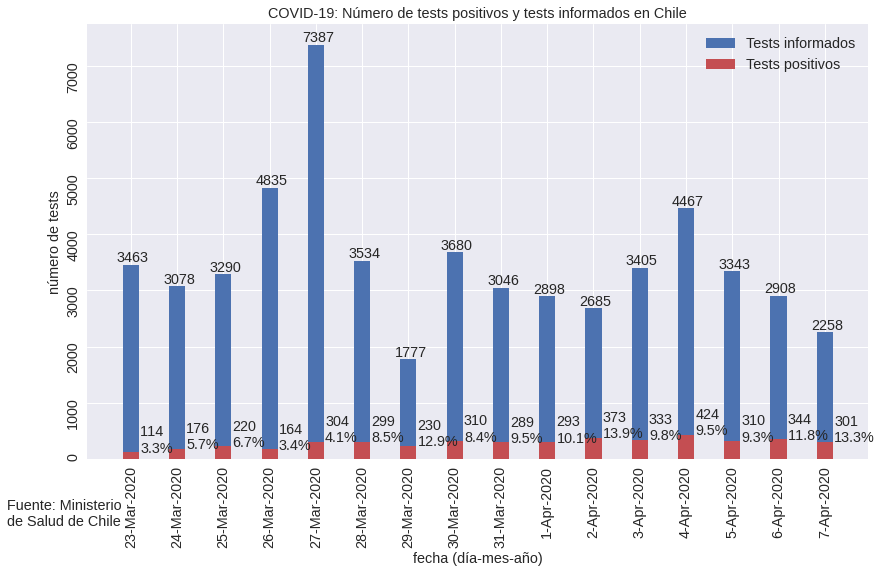

In [6]:
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(tests_raw.keys(), tests_raw, 0.35, label="Tests informados")
ax.bar(positive_tests.keys(), positive_tests, 0.35, color='C2', label='Tests positivos')
for i, val in enumerate(tests_raw):
  ax.text(i-0.3, val+50, str(int(val)), fontsize='x-large')
for i, val in enumerate(positive_tests):
  ax.text(i+0.2, val, f"{int(val)}\n{100*val/tests_raw.iloc[i]:.1f}%", fontsize='x-large')

ax.annotate('Fuente: Ministerio\nde Salud de Chile', (0,0), (-80,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

ax.tick_params(labelrotation=90)

ax.set_title(f'COVID-19: Número de tests positivos y tests informados en Chile', fontsize='x-large')
ax.set_xlabel(f'fecha (día-mes-año)', fontsize='x-large')
ax.set_ylabel(f'número de tests', fontsize='x-large')

plt.legend(fontsize='x-large')
plt.xticks(tests_raw.keys(), fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.savefig("2020-04-07-Chile-Tests.png", bbox_inches='tight', format='png', dvi=700)

In [0]:
from google.colab import files
files.download("2020-04-07-Chile-Tests.png")